In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/KDT_Natural_Language

/content/drive/MyDrive/Colab Notebooks/KDT_Natural_Language


# Tensor 생성 듀토리얼
---

In [2]:
import torch

In [3]:
torch.__version__

'1.12.1+cu113'

In [42]:
t1 = torch.tensor([1.,2,3])

In [43]:
type(t1),t1.shape, t1.dtype,t1.device

(torch.Tensor, torch.Size([3]), torch.float32, device(type='cpu'))

In [44]:
t2 = torch.tensor([1.,2,3])

In [45]:
type(t2), t2.shape, t2.dtype, t2.device, t2.ndim

(torch.Tensor, torch.Size([3]), torch.float32, device(type='cpu'), 1)

In [46]:
t3 = torch.tensor([[1.,2,3],[1,2,2]])

In [47]:
type(t3), t3.shape, t3.dtype, t3.device, t3.ndim

(torch.Tensor, torch.Size([2, 3]), torch.float32, device(type='cpu'), 2)

In [48]:
torch.zeros(size = (10,3))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [49]:
t4 = torch.zeros(size = (10,3))
t4 = torch.ones_like(t3)
t4

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [50]:
type(t4)

(torch.Tensor, torch.float32)

In [51]:
torch.ones_like(t3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [52]:
t5 = torch.rand_like(t4) 

### Indexing % Slicing

In [21]:
t3[0]

tensor([1, 2, 3])

In [22]:
t3[1]

tensor([1, 2, 2])

In [23]:
# 열(column) => [행, 열]
t3[:,0], t3[0,0]

(tensor([1, 1]), tensor(1))

In [53]:
t3.mean()

tensor(1.8333)

In [38]:
t3.max()

tensor(3)

In [39]:
t3.min()

tensor(1)

In [56]:
t3.mul_(2)

tensor([[ 8., 16., 24.],
        [ 8., 16., 16.]])

In [73]:
t3 = t3.numpy()
t3

array([[ 8., 16., 24.],
       [ 8., 16., 16.]], dtype=float32)

In [74]:
t3 = torch.from_numpy(t3) 
t3

tensor([[ 8., 16., 24.],
        [ 8., 16., 16.]])

In [35]:
torch.cuda.is_available()

True

In [ ]:
# underbar를 붙이면 영구적 변환 (inplace와 같은 역할)
t1 = torch.tensor([3,6,9])
print(t1)
print(t1.add_(10))
print(t1) 

# 모델 생성 듀토리얼
---

In [2]:
import os
import torch
from torch import nn                           # 신경망 모듈
from torch.utils.data import DataLoader        # 데이터 로딩 관련 모듈
from torchvision import datasets, transforms   # torch 저장소 데이터셋 모듈

### [1] 데이터 준비

In [3]:
# Tensor의 저장소 설정을 위한 체크
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


### [2] NN모델 생성

In [5]:
# 순차적인 Layer 구성 => Sequential, Layer...
class NeuralNetwork(nn.Module):

    # 생성자 메서드, NeuralNetwork() 객체 생성 시 실행
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            # 입력층(input_dim, output_dim)
            nn.Linear(28*28, 512),
            nn.ReLU(),

            # 은닉층(input_dim_, output_dim)
            nn.Linear(512, 512),
            nn.ReLU(),

            # 출력층(input_Dim, output_dim)
            nn.Linear(512, 10),
        )
    # NN모델이 동작을 시작할 때 실행
    def forward(self, x):
        # 1차원 데이터 변환
        x = self.flatten(x)

        # NN모델에 입력 데이터 전달
        logits = self.linear_relu_stack(x)
        return logits

In [9]:
# NN모델 생성
mnistM = NeuralNetwork().to(device)
print(mnistM)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [17]:
# 데이터 준비 
X = torch.rand(1,28,28, device = device)
print(f'X => {X}')

X => tensor([[[0.7082, 0.7775, 0.4426, 0.3014, 0.5469, 0.5989, 0.5335, 0.6483,
          0.8566, 0.7276, 0.8601, 0.1083, 0.1441, 0.5291, 0.2262, 0.2378,
          0.4234, 0.1307, 0.8259, 0.7689, 0.4477, 0.2757, 0.6265, 0.4315,
          0.3190, 0.0714, 0.0835, 0.8230],
         [0.0579, 0.5825, 0.2166, 0.7416, 0.2185, 0.0997, 0.4888, 0.2797,
          0.3751, 0.5316, 0.1099, 0.0677, 0.9413, 0.1051, 0.2398, 0.0744,
          0.9836, 0.6747, 0.7038, 0.3640, 0.1405, 0.8000, 0.4723, 0.4932,
          0.9647, 0.6715, 0.8058, 0.9361],
         [0.6522, 0.7780, 0.9627, 0.1387, 0.6468, 0.6743, 0.5429, 0.5086,
          0.0773, 0.7204, 0.0510, 0.3438, 0.4988, 0.4452, 0.1134, 0.3938,
          0.9143, 0.3931, 0.7919, 0.2478, 0.9408, 0.3864, 0.9673, 0.5448,
          0.8789, 0.8549, 0.3088, 0.8898],
         [0.0272, 0.3734, 0.9927, 0.5525, 0.8092, 0.2200, 0.4831, 0.5368,
          0.3467, 0.4436, 0.1764, 0.3971, 0.9900, 0.5120, 0.4701, 0.3696,
          0.6970, 0.3867, 0.2694, 0.5648, 0.9461, 0.

In [15]:
inputT = torch.rand(1,28,28)
inputT.shape, inputT.ndim

(torch.Size([1, 28, 28]), 3)

In [13]:
# shape, dimension 예제
print(torch.rand(3)), 
print(torch.rand(3,2))
print(torch.rand(3,2,2))

tensor([0.0038, 0.8933, 0.2004])
tensor([[0.0258, 0.8330],
        [0.2630, 0.9242],
        [0.5329, 0.9761]])
tensor([[[0.8561, 0.9090],
         [0.0455, 0.1365]],

        [[0.3752, 0.9099],
         [0.1182, 0.3450]],

        [[0.9910, 0.6912],
         [0.3375, 0.4826]]])


In [18]:
logits = mnistM(X)

In [19]:
print(f'학습 결과 ----------\n{logits},{logits.shape}')

학습 결과 ----------
tensor([[ 0.0452, -0.0042, -0.0735,  0.0051,  0.1059,  0.0031, -0.0375, -0.0133,
         -0.0081, -0.0878]], device='cuda:0', grad_fn=<AddmmBackward0>),torch.Size([1, 10])


In [20]:
# 결과 분석
pred_probab = nn.Softmax(dim = 1)(logits)
print(f'pred_probab: {pred_probab}')

y_pred = pred_probab.argmax(1)
print(f'Predicted class: {y_pred}')

pred_probab: tensor([[0.1052, 0.1001, 0.0934, 0.1010, 0.1117, 0.1008, 0.0968, 0.0992, 0.0997,
         0.0921]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([4], device='cuda:0')


# 실습 : 데이터 로드해서 실습
---
- FashinMNIST

### 데이터로딩

In [21]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [24]:
type(training_data), training_data.data.shape

(torchvision.datasets.mnist.FashionMNIST, torch.Size([60000, 28, 28]))

### 이미지 시각화

img =>torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img =>torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img =>torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img =>torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img =>torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img =>torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img =>torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img =>torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])
img =>torch.Size([1, 28, 28])
a.shape => torch.Size([28, 28])


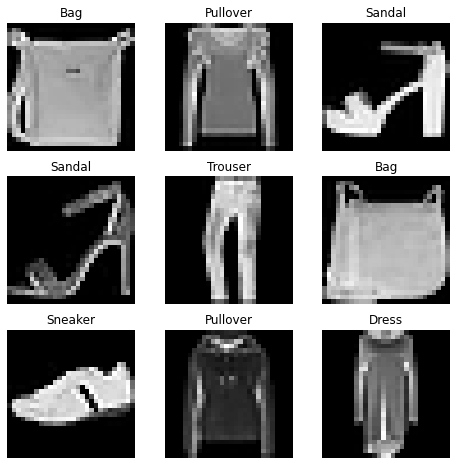

In [28]:
# 이미지 확인
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")

    # squeeze()   : 1차원 형태 제거,(1,28,28 ) ->(28,28) 
    # unsqueeze() : 1차원 형태 추가 
    print(f'img =>{img.shape}')
    plt.imshow(img.squeeze(), cmap="gray")  
    a = img.squeeze()
    print(f'a.shape => {a.shape}')
plt.show()

### 변형
---
- FashionMNIST 특징(feature)은 PIL Image 형식이며, 정답(label)은 정수(integer)입니다. 
  - ToTensor : 정규화(normalize)
    - PIL Image나 NumPy ndarray 를 FloatTensor 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 [0., 1.] 범위로 비례하여 조정(scale)합니다.
  - Lambda   : 원-핫(one-hot)으로 부호화(encode)된 텐서 형태의 정답(label)으로 변환
    - 이 함수는 먼저 (데이터셋 정답의 개수인) 크기 10짜리 영 텐서(zero tensor)를 만들고, scatter_ 를 호출하여 주어진 정답 y 에 해당하는 인덱스에 value=1 을 할당합니다.

In [36]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [37]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

### 신경망 모델 구축하기

In [38]:
# 모듈로딩
import os
import torch
from torch import nn #PyTorch의 모든 모듈은 nn.Module 의 하위 클래스(subclass)
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [39]:
# GPU or CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [42]:
# 모델 클래스 정의
# 신경망 모델을 nn.Module 의 하위클래스로 정의하고, __init__ 에서 신경망 계층들을 초기화
# nn.Module 을 상속받은 모든 클래스는 forward 메소드에 입력 데이터에 대한 연산들을 구현

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [43]:
# NeuralNetwork 의 인스턴스(instance)를 생성하고 이를 device 로 이동한 뒤, 구조(structure)를 출력
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [44]:
# 모델을 사용하기 위해 입력 데이터를 전달. 
# 이는 일부 백그라운드 연산들 과 함께 모델의 forward 를 실행. 
# model.forward() 를 직접 호출하지 마세요!

# 모델에 입력을 호출하면 각 분류(class)에 대한 원시(raw) 예측값이 있는 10-차원 텐서가 반환됨. 
# 원시 예측값을 nn.Softmax 모듈의 인스턴스에 통과시켜 예측 확률을 얻습니다.

X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5], device='cuda:0')


### 모델 계층(Layer) 신경망을 통과하는 과정 이해하기.
- (예시: 28x28 크기의 이미지 3개로 구성된 미니배치)

In [45]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [46]:
# nn.Flatten
# 계층을 초기화하여 각 28x28의 2D 이미지를 784 픽셀 값을 갖는 연속된 배열로 변환. 
# (dim=0의 미니배치 차원은 유지됩니다.)

flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [47]:
# nn.Linear
# 선형 계층 
# 저장된 가중치(weight)와 편향(bias)을 사용
# 입력에 선형 변환(linear transformation)을 적용하는 모듈.

layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [48]:
# nn.ReLU
# 비선형 활성화(activation)는 모델의 입력과 출력 사이에 복잡한 관계(mapping)를 만듭니다. 
# 비선형 활성화는 선형 변환 후에 적용되어 비선형성(nonlinearity) 을 도입하고, 신경망이 다양한 현상을 학습할 수 있도록 돕습니다.

# 이 모델에서는 nn.ReLU 를 선형 계층들 사이에 사용하지만, 모델을 만들 때는 비선형성을 가진 다른 활성화를 도입할 수도 있습니다.

print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1691,  0.1610, -0.2834, -0.3729, -0.5479, -0.2399,  0.0795,  0.1028,
          0.0684,  1.0879,  0.2129,  0.2290,  0.4838, -0.3146,  0.3793, -0.2269,
          0.1112, -0.2302, -0.4791,  0.1740],
        [ 0.4004,  0.3788, -0.1585, -0.3551, -0.4495, -0.4216,  0.4168, -0.1294,
         -0.2122,  1.0360,  0.4583,  0.1630,  0.4372, -0.3880,  0.0538, -0.2325,
          0.2719, -0.0757, -0.3891, -0.1850],
        [ 0.0225,  0.1741,  0.2073, -0.3863, -0.1325, -0.4547,  0.2657, -0.3122,
          0.1283,  0.8007,  0.3010,  0.1751,  0.7833, -0.0847,  0.5896, -0.3758,
          0.1646, -0.0053, -0.1642,  0.1158]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1691, 0.1610, 0.0000, 0.0000, 0.0000, 0.0000, 0.0795, 0.1028, 0.0684,
         1.0879, 0.2129, 0.2290, 0.4838, 0.0000, 0.3793, 0.0000, 0.1112, 0.0000,
         0.0000, 0.1740],
        [0.4004, 0.3788, 0.0000, 0.0000, 0.0000, 0.0000, 0.4168, 0.0000, 0.0000,
         1.0360, 0.4583, 0.1630, 0.4372, 0.0000, 0.05

In [50]:
# nn.Sequential
# nn.Sequential은 순서를 갖는 모듈의 컨테이너입니다. 
# 데이터는 정의된 것과 같은 순서로 모든 모듈들을 통해 전달됩니다. 
# 순차 컨테이너(sequential container)를 사용하여 아래의 seq_modules 와 같은 신경망을 빠르게 만들 수 있습니다.

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [51]:
# nn.Softmax
# 신경망의 마지막 선형 계층은 nn.Softmax 모듈에 전달될 ([-infty, infty] 범위의 원시 값(raw value)인) logits 를 반환 
# logits는 모델의 각 분류(class)에 대한 예측 확률을 나타내도록 [0, 1] 범위로 비례하여 조정(scale)
# dim 매개변수는 값의 합이 1이 되는 차원을 나타냅니다.

softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [52]:
# 모델 매개변수

# 신경망 내부의 많은 계층들은 매개변수화(parameterize) 됩니다. 
# 즉, 학습 중에 최적화되는 가중치와 편향과 연관지어집니다. 
# nn.Module 을 상속하면 모델 객체 내부의 모든 필드들이 자동으로 추적(track)
# 모델의 parameters() 및 named_parameters() 메소드로 모든 매개변수에 접근할 수 있게됨.

# 이 예제에서는 각 매개변수들을 순회하며(iterate), 매개변수의 크기와 값을 출력합니다.

print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0088,  0.0247,  0.0281,  ..., -0.0254, -0.0209,  0.0148],
        [ 0.0214, -0.0293,  0.0355,  ..., -0.0016, -0.0125, -0.0002]],
       device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([ 0.0169, -0.0062], device='cuda:0', grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0240, -0.0434,  0.0214,  ...,  0.0093, -0.0277, -0.0149],
        [-0.0204, -0.0128,  0.0387,  ...,  0.0222, -0.0207, -0.0219]],
       device='cuda:0', grad_fn=<Sl